In [2]:
# Make 'src/' importable from anywhere in the repo
import sys, os
from pathlib import Path

ROOT = Path.cwd()
# climb up until we find a folder that contains 'src'
while not (ROOT / "src").exists() and ROOT != ROOT.parent:
    ROOT = ROOT.parent
sys.path.insert(0, str(ROOT))

# sanity check
assert (ROOT / "src" / "__init__.py").exists(), f"'src/__init__.py' not found at {ROOT}/src"
print("Added to sys.path:", ROOT)

Added to sys.path: C:\Users\hirshikesh\Desktop\lct-corr-replication


In [4]:
# Imports
import numpy as np, matplotlib.pyplot as plt
from src.LCT import lct_edge_stat, lct_threshold_normal
from src.FisherBaselines import two_group_z_stat, pvals_from_Z, bh_threshold
from src.Simulate import make_block_cov, sample_gaussian, upper_tri_pairs, truth_mask_block

In [5]:
# Data Grid
rng = np.random.default_rng(0)
p, n1, n2, rho, block = 250, 80, 80, 0.3, 20
X = rng.normal(size=(n1, p))
Sigma = make_block_cov(p, rho=rho, block_size=block)
Y = sample_gaussian(n2, Sigma, seed=1)
truth = truth_mask_block(p, block)
iu, ju = upper_tri_pairs(p)

In [6]:
# LCT-N (gaussian variance)
T, R1, R2 = lct_edge_stat(X, Y, var_method="gaussian")
t_hat, mask_lct = lct_threshold_normal(T, alpha=0.05)
mask_lct.sum(), t_hat


(np.int64(0), np.float64(4.676494248036242))

In [7]:
# Fisher baseline for comparison
Z = two_group_z_stat(np.corrcoef(X, rowvar=False), np.corrcoef(Y, rowvar=False), n1, n2)
pvals = pvals_from_Z(Z)[iu, ju]
mask_bh = bh_threshold(pvals, 0.05)
mask_lct.sum(), mask_bh.sum()

(np.int64(0), np.int64(0))

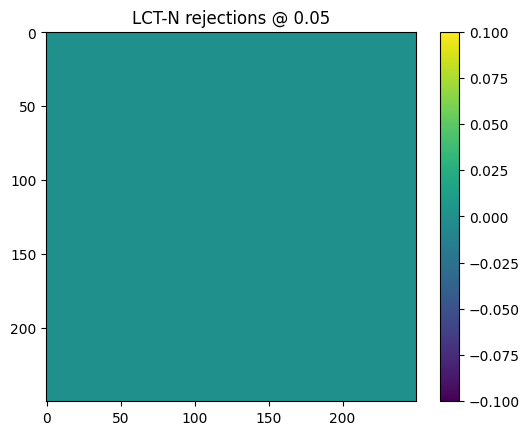

In [8]:
# quick heatmap of LCT rejections
M = np.zeros((p,p), dtype=int)
M[iu, ju] = mask_lct.astype(int); M = M + M.T
plt.imshow(M, interpolation="nearest"); plt.title("LCT-N rejections @ 0.05"); plt.colorbar(); plt.show()